In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.neighbors import KNeighborsRegressor

In [3]:
A= pd.read_csv('fair_pay_data.csv', index_col=0)

In [4]:
A= pd.get_dummies(A, columns=['job_level'])
A= pd.get_dummies(A, columns=['department'])
A= pd.get_dummies(A, columns=['new_hire'])

In [5]:
A.shape

(1470, 9)

In [7]:
x = A.iloc[:, :-1].values  
y = A.iloc[:, 8].values 

In [8]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3, random_state=1)

In [9]:
scaler = StandardScaler()  
scaler.fit(xtrain)

X_train = scaler.transform(xtrain)  
X_test = scaler.transform(xtest)  

In [10]:
Reg = KNeighborsRegressor(n_neighbors=3)  
Reg.fit(xtrain, ytrain) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [11]:
predict=Reg.predict(xtest)

In [12]:
rmse= np.sqrt(np.sum((predict-ytest)**2/len(ytest)))


In [13]:
rmse

0.5638831640740194

In [14]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error.append(np.mean(pred_i != ytest))

Text(0,0.5,'Mean Error')

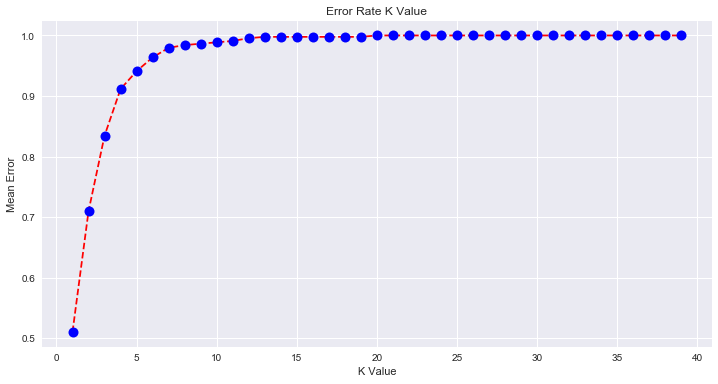

In [15]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [17]:
rmse = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    rmse1= np.sqrt(np.sum((pred_i-ytest)**2/len(ytest)))
    rmse.append(rmse1)

Text(0,0.5,'RMSE Error')

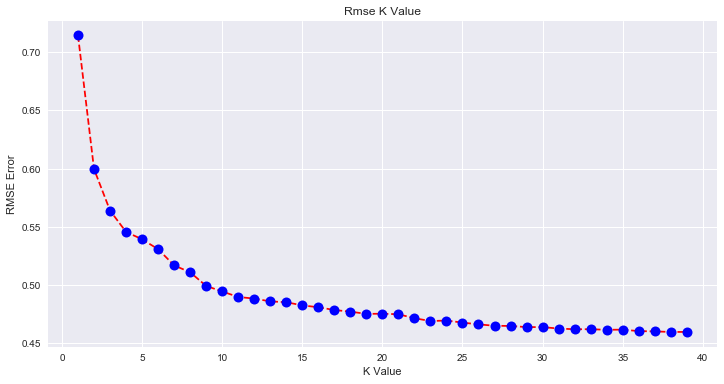

In [18]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), rmse, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Rmse K Value')  
plt.xlabel('K Value')  
plt.ylabel('RMSE Error')